# 📌 Extracción

In [1]:
import requests
import pandas as pd
import json
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import math

In [2]:
url = r'https://raw.githubusercontent.com/ingridcristh/challenge2-data-science-LATAM/main/TelecomX_Data.json'

In [3]:
try:
    response = requests.get(url)
    response.raise_for_status()

    data = response.json()
    print('Data successfully fetched from API!')

    df_telecom = pd.json_normalize(data)

except requests.exceptions.RequestException as e:
    print(f'Error fetching: {e}')

Data successfully fetched from API!


In [4]:
df_telecom

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,No,Female,0,No,No,13,Yes,No,DSL,...,No,No,Yes,No,No,One year,No,Mailed check,55.15,742.9
7263,9992-RRAMN,Yes,Male,0,Yes,No,22,Yes,Yes,Fiber optic,...,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.7
7264,9992-UJOEL,No,Male,0,No,No,2,Yes,No,DSL,...,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75
7265,9993-LHIEB,No,Male,0,Yes,Yes,67,Yes,No,DSL,...,No,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65


In [5]:
df_telecom.columns

Index(['customerID', 'Churn', 'customer.gender', 'customer.SeniorCitizen',
       'customer.Partner', 'customer.Dependents', 'customer.tenure',
       'phone.PhoneService', 'phone.MultipleLines', 'internet.InternetService',
       'internet.OnlineSecurity', 'internet.OnlineBackup',
       'internet.DeviceProtection', 'internet.TechSupport',
       'internet.StreamingTV', 'internet.StreamingMovies', 'account.Contract',
       'account.PaperlessBilling', 'account.PaymentMethod',
       'account.Charges.Monthly', 'account.Charges.Total'],
      dtype='object')

In [6]:
df_telecom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   object 
 2   customer.gender            7267 non-null   object 
 3   customer.SeniorCitizen     7267 non-null   int64  
 4   customer.Partner           7267 non-null   object 
 5   customer.Dependents        7267 non-null   object 
 6   customer.tenure            7267 non-null   int64  
 7   phone.PhoneService         7267 non-null   object 
 8   phone.MultipleLines        7267 non-null   object 
 9   internet.InternetService   7267 non-null   object 
 10  internet.OnlineSecurity    7267 non-null   object 
 11  internet.OnlineBackup      7267 non-null   object 
 12  internet.DeviceProtection  7267 non-null   object 
 13  internet.TechSupport       7267 non-null   objec

# 🔧 Transformación

`account.Charges.Total` is a `object`

In [7]:
account_tot = pd.to_numeric(df_telecom['account.Charges.Total'],errors='coerce')

In [8]:
account_tot[account_tot.isnull()]

975    NaN
1775   NaN
1955   NaN
2075   NaN
2232   NaN
2308   NaN
2930   NaN
3134   NaN
3203   NaN
4169   NaN
5599   NaN
Name: account.Charges.Total, dtype: float64

#### **Cambiamos todo los valores `NaN` de la columna `account.Charges.Total` por `0`**

In [9]:
df_telecom['account.Charges.Total'] = pd.to_numeric(df_telecom['account.Charges.Total'], errors='coerce')

df_telecom['account.Charges.Total'] = df_telecom['account.Charges.Total'].fillna(0)

print("Nulls remaining:", df_telecom['account.Charges.Total'].isnull().sum())

Nulls remaining: 0


**Verificamos los `Dtype` de cada columna**

In [10]:
df_telecom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   object 
 2   customer.gender            7267 non-null   object 
 3   customer.SeniorCitizen     7267 non-null   int64  
 4   customer.Partner           7267 non-null   object 
 5   customer.Dependents        7267 non-null   object 
 6   customer.tenure            7267 non-null   int64  
 7   phone.PhoneService         7267 non-null   object 
 8   phone.MultipleLines        7267 non-null   object 
 9   internet.InternetService   7267 non-null   object 
 10  internet.OnlineSecurity    7267 non-null   object 
 11  internet.OnlineBackup      7267 non-null   object 
 12  internet.DeviceProtection  7267 non-null   object 
 13  internet.TechSupport       7267 non-null   objec

Verificamos los `valores unicos` para cada `columna`

In [11]:
for col in df_telecom.select_dtypes(include='object').columns:
    if col != 'customerID':
        print(f'---{col}---')
        print(f' sus valores unicos: {df_telecom[col].unique()}.')
        print('\n')


---Churn---
 sus valores unicos: ['No' 'Yes' ''].


---customer.gender---
 sus valores unicos: ['Female' 'Male'].


---customer.Partner---
 sus valores unicos: ['Yes' 'No'].


---customer.Dependents---
 sus valores unicos: ['Yes' 'No'].


---phone.PhoneService---
 sus valores unicos: ['Yes' 'No'].


---phone.MultipleLines---
 sus valores unicos: ['No' 'Yes' 'No phone service'].


---internet.InternetService---
 sus valores unicos: ['DSL' 'Fiber optic' 'No'].


---internet.OnlineSecurity---
 sus valores unicos: ['No' 'Yes' 'No internet service'].


---internet.OnlineBackup---
 sus valores unicos: ['Yes' 'No' 'No internet service'].


---internet.DeviceProtection---
 sus valores unicos: ['No' 'Yes' 'No internet service'].


---internet.TechSupport---
 sus valores unicos: ['Yes' 'No' 'No internet service'].


---internet.StreamingTV---
 sus valores unicos: ['Yes' 'No' 'No internet service'].


---internet.StreamingMovies---
 sus valores unicos: ['No' 'Yes' 'No internet service'].


---acc

#### Resolveremos **dos** problemas:

**1.** `---Churn---` sus valores unicos: `['No' 'Yes' '']`


In [12]:
df_telecom = df_telecom[df_telecom['Churn'] != '']
df_telecom['Churn'].unique()

array(['No', 'Yes'], dtype=object)

**2.**  `No phone service` inside `MultipleLines`. `No internet service` inside `OnlineSecurity`, `OnlineBackup`, etc.

In [13]:
cols_to_fix = ['phone.MultipleLines', 'internet.OnlineSecurity', 'internet.OnlineBackup', 
               'internet.DeviceProtection', 'internet.TechSupport', 'internet.StreamingTV', 
               'internet.StreamingMovies']

for col in cols_to_fix:
    df_telecom[col] = df_telecom[col].replace(['No internet service', 'No phone service'], 'No')

df_telecom['internet.OnlineSecurity'].unique()

C:\Users\mata_\AppData\Local\Temp\ipykernel_21236\977295831.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_telecom[col] = df_telecom[col].replace(['No internet service', 'No phone service'], 'No')


array(['No', 'Yes'], dtype=object)

#### Verificamos que se hayan implementado los cambios

In [14]:
for col in df_telecom.select_dtypes(include='object').columns:
    if col != 'customerID':
        print(f'---{col}---')
        print(f' sus valores unicos: {df_telecom[col].unique()}.')
        print('\n')

---Churn---
 sus valores unicos: ['No' 'Yes'].


---customer.gender---
 sus valores unicos: ['Female' 'Male'].


---customer.Partner---
 sus valores unicos: ['Yes' 'No'].


---customer.Dependents---
 sus valores unicos: ['Yes' 'No'].


---phone.PhoneService---
 sus valores unicos: ['Yes' 'No'].


---phone.MultipleLines---
 sus valores unicos: ['No' 'Yes'].


---internet.InternetService---
 sus valores unicos: ['DSL' 'Fiber optic' 'No'].


---internet.OnlineSecurity---
 sus valores unicos: ['No' 'Yes'].


---internet.OnlineBackup---
 sus valores unicos: ['Yes' 'No'].


---internet.DeviceProtection---
 sus valores unicos: ['No' 'Yes'].


---internet.TechSupport---
 sus valores unicos: ['Yes' 'No'].


---internet.StreamingTV---
 sus valores unicos: ['Yes' 'No'].


---internet.StreamingMovies---
 sus valores unicos: ['No' 'Yes'].


---account.Contract---
 sus valores unicos: ['One year' 'Month-to-month' 'Two year'].


---account.PaperlessBilling---
 sus valores unicos: ['Yes' 'No'].


---a

#### Creamos la columna de `cuentas diarias`


In [15]:
df_telecom['account_Charges.Daily'] = df_telecom['account.Charges.Monthly']/30
df_telecom.head()

C:\Users\mata_\AppData\Local\Temp\ipykernel_21236\404746479.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_telecom['account_Charges.Daily'] = df_telecom['account.Charges.Monthly']/30


,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total,account_Charges.Daily
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30,2.186667
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40,1.996667
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85,2.463333
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85,3.266667
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40,2.796667


#### Traducimos el nombre de las columnas

In [16]:
column_espaniol = {
    'customerID': 'ID_Cliente',
    'Churn': 'Churn', 
    'customer.gender': 'Genero',
    'customer.SeniorCitizen': 'Mayor_65',
    'customer.Partner': 'Pareja',
    'customer.Dependents': 'Dependientes',
    'customer.tenure': 'Meses_Contrato',
    'phone.PhoneService': 'Servicio_Telefonico',
    'phone.MultipleLines': 'Multiples_Lineas',
    'internet.InternetService': 'Servicio_Internet',
    'internet.OnlineSecurity': 'Seguridad_Online',
    'internet.OnlineBackup': 'Respaldo_Online',
    'internet.DeviceProtection': 'Proteccion_Dispositivo',
    'internet.TechSupport': 'Soporte_Tecnico',
    'internet.StreamingTV': 'TV_Streaming',
    'internet.StreamingMovies': 'Peliculas_Streaming',
    'account.Contract': 'Contrato',
    'account.PaperlessBilling': 'Facturacion_Sin_Papel',
    'account.PaymentMethod': 'Metodo_Pago',
    'account.Charges.Monthly': 'Cargos_Mensuales',
    'account.Charges.Total': 'Cargos_Totales',
    'account_Charges.Daily': 'Cargos_Diarios' # The one we just created
}

df_telecom = df_telecom.rename(columns=column_espaniol)

print(df_telecom.columns)

Index(['ID_Cliente', 'Churn', 'Genero', 'Mayor_65', 'Pareja', 'Dependientes',
       'Meses_Contrato', 'Servicio_Telefonico', 'Multiples_Lineas',
       'Servicio_Internet', 'Seguridad_Online', 'Respaldo_Online',
       'Proteccion_Dispositivo', 'Soporte_Tecnico', 'TV_Streaming',
       'Peliculas_Streaming', 'Contrato', 'Facturacion_Sin_Papel',
       'Metodo_Pago', 'Cargos_Mensuales', 'Cargos_Totales', 'Cargos_Diarios'],
      dtype='object')


#### Realizamos lo siguiente:

1. **Convertimos los valores `Sí` y `No` en valores binarios `1` y `0`**

2. **Traducimos los valores para cada columna**

In [17]:
# --- BLOQUE 1: TRANSFORMACIÓN NUMÉRICA ---
columnas_binarias = [
    'Pareja', 'Dependientes', 'Servicio_Telefonico', 'Multiples_Lineas', 
    'Seguridad_Online', 'Respaldo_Online', 'Proteccion_Dispositivo', 
    'Soporte_Tecnico', 'TV_Streaming', 'Peliculas_Streaming', 
    'Facturacion_Sin_Papel', 'Churn'
]


mapa_binario = {'Yes': 1, 'No': 0}

for col in columnas_binarias:
    if col in df_telecom.columns:
        df_telecom[col] = df_telecom[col].map(mapa_binario).fillna(df_telecom[col])

# Verificación rápida
print("Transformación numérica lista.")
print(df_telecom['Churn'].unique()) 

Transformación numérica lista.
[0 1]


In [18]:
# --- BLOQUE 2: ETIQUETADO PARA VISUALIZACIÓN ---
df_viz = df_telecom.copy()

maps = {
    'Genero': {'Female': 'Femenino', 'Male': 'Masculino'},
    'Servicio_Internet': {'DSL': 'DSL', 'Fiber optic': 'Fibra Óptica', 'No': 'No tiene'},
    'Contrato': {'Month-to-month': 'Mensual', 'One year': '1 Año', 'Two year': '2 Años'},
    'Metodo_Pago': {
        'Electronic check': 'Cheque Elec.',
        'Mailed check': 'Cheque Enviado',
        'Bank transfer (automatic)': 'Transferencia',
        'Credit card (automatic)': 'Tarjeta de Crédito'
    },

    'Pareja': {1: 'Sí', 0: 'No'},
    'Dependientes': {1: 'Sí', 0: 'No'},
    'Servicio_Telefonico': {1: 'Sí', 0: 'No'},
    'Churn': {1: 'Desertó', 0: 'No desertó'} 

}

for col, mapping in maps.items():
    if col in df_viz.columns:
        df_viz[col] = df_viz[col].map(mapping).fillna(df_viz[col])

print("Traducción para gráficas lista.")
print(df_viz['Churn'].unique())

Traducción para gráficas lista.
['No desertó' 'Desertó']


In [19]:
# --- PASO EXTRA: CONVERTIR LAS COLUMNAS CATEGÓRICAS RESTANTES ---
# El árbol necesita NÚMEROS para funcionar. Vamos a darle números.

mapas_restantes = {
    # Para Internet: 0=Nada, 1=DSL, 2=Fibra (Así 2 es "más intenso" que 1)
    'Servicio_Internet': {'No': 0, 'DSL': 1, 'Fiber optic': 2},
    
    # Para Contrato: 0=Mensual, 1=1 Año, 2=2 Años (Orden lógico de duración)
    'Contrato': {'Month-to-month': 0, 'One year': 1, 'Two year': 2},
    
    # Para Pago: Asignamos un número arbitrario a cada uno
    'Metodo_Pago': {
        'Electronic check': 0,
        'Mailed check': 1,
        'Bank transfer (automatic)': 2,
        'Credit card (automatic)': 3
    }
}

# Aplicamos los cambios al dataframe numérico (df_telecom)
for col, mapa in mapas_restantes.items():
    if col in df_telecom.columns:
        # Usamos el truco de seguridad que ya conoces
        df_telecom[col] = df_telecom[col].map(mapa).fillna(df_telecom[col])

# Verificamos que ya NO queden textos
print("Tipos de datos actuales:")
print(df_telecom[['Servicio_Internet', 'Contrato', 'Metodo_Pago']].dtypes)
print("\n¡Listo! Ahora sí corre el código del árbol.")

Tipos de datos actuales:
Servicio_Internet    int64
Contrato             int64
Metodo_Pago          int64
dtype: object

¡Listo! Ahora sí corre el código del árbol.


In [20]:
df_telecom.head()

,ID_Cliente,Churn,Genero,Mayor_65,Pareja,Dependientes,Meses_Contrato,Servicio_Telefonico,Multiples_Lineas,Servicio_Internet,...,Proteccion_Dispositivo,Soporte_Tecnico,TV_Streaming,Peliculas_Streaming,Contrato,Facturacion_Sin_Papel,Metodo_Pago,Cargos_Mensuales,Cargos_Totales,Cargos_Diarios
0,0002-ORFBO,0,Female,0,1,1,9,1,0,1,...,0,1,1,0,1,1,1,65.6,593.30,2.186667
1,0003-MKNFE,0,Male,0,0,0,9,1,1,1,...,0,0,0,1,0,0,1,59.9,542.40,1.996667
2,0004-TLHLJ,1,Male,0,0,0,4,1,0,2,...,1,0,0,0,0,1,0,73.9,280.85,2.463333
3,0011-IGKFF,1,Male,1,1,0,13,1,0,2,...,1,0,1,1,0,1,0,98.0,1237.85,3.266667
4,0013-EXCHZ,1,Female,1,1,0,3,1,0,2,...,0,1,1,0,0,1,1,83.9,267.40,2.796667


In [21]:
df_telecom.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 0 to 7266
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ID_Cliente              7043 non-null   object 
 1   Churn                   7043 non-null   int64  
 2   Genero                  7043 non-null   object 
 3   Mayor_65                7043 non-null   int64  
 4   Pareja                  7043 non-null   int64  
 5   Dependientes            7043 non-null   int64  
 6   Meses_Contrato          7043 non-null   int64  
 7   Servicio_Telefonico     7043 non-null   int64  
 8   Multiples_Lineas        7043 non-null   int64  
 9   Servicio_Internet       7043 non-null   int64  
 10  Seguridad_Online        7043 non-null   int64  
 11  Respaldo_Online         7043 non-null   int64  
 12  Proteccion_Dispositivo  7043 non-null   int64  
 13  Soporte_Tecnico         7043 non-null   int64  
 14  TV_Streaming            7043 non-null   int64

# 📊 Carga y análisis

In [22]:
df_telecom.describe()

,Churn,Mayor_65,Pareja,Dependientes,Meses_Contrato,Servicio_Telefonico,Multiples_Lineas,Servicio_Internet,Seguridad_Online,Respaldo_Online,Proteccion_Dispositivo,Soporte_Tecnico,TV_Streaming,Peliculas_Streaming,Contrato,Facturacion_Sin_Papel,Metodo_Pago,Cargos_Mensuales,Cargos_Totales,Cargos_Diarios
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.265370,0.162147,0.483033,0.299588,32.371149,0.903166,0.421837,1.222916,0.286668,0.344881,0.343888,0.290217,0.384353,0.387903,0.690473,0.592219,1.315633,64.761692,2279.734304,2.158723
std,0.441561,0.368612,0.499748,0.458110,24.559481,0.295752,0.493888,0.778877,0.452237,0.475363,0.475038,0.453895,0.486477,0.487307,0.833755,0.491457,1.148907,30.090047,2266.794470,1.003002
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,0.000000,0.608333
25%,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,35.500000,398.550000,1.183333
50%,0.000000,0.000000,0.000000,0.000000,29.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,70.350000,1394.550000,2.345000
75%,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,89.850000,3786.600000,2.995000
max,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,118.750000,8684.800000,3.958333


#### Qué `porcentaje de desersión` tenemos?

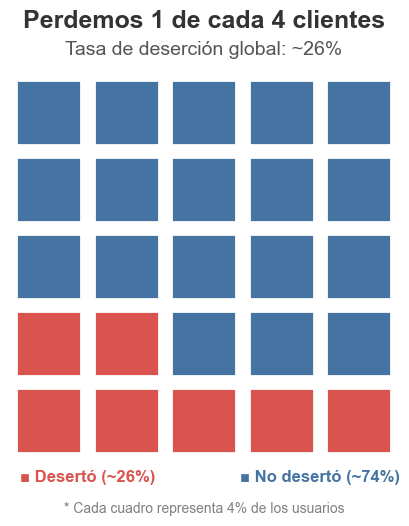

<Figure size 640x480 with 0 Axes>

In [41]:
import matplotlib.pyplot as plt

x = np.tile(np.arange(5), 5)
y = np.repeat(np.arange(5), 5)

colors = []
for i in range(25):
    if i < 7: 
        colors.append('#d9534f')
    else:
        colors.append('#4674a2') 

fig, ax = plt.subplots(figsize=(5, 5)) 

# Dibujar los "Squarts" (Cuadros)
# Usamos marker='s' para cuadrados
ax.scatter(x, y, c=colors, s=2200, marker='s', edgecolors='white', linewidth=2)

ax.set_xlim(-0.5, 4.5)
ax.set_ylim(-0.5, 4.5)
ax.axis('off')

plt.text(x=2, y=5.1, s="Perdemos 1 de cada 4 clientes", 
         fontsize=18, fontweight='bold', ha='center', color='#333333')


plt.text(x=2, y=4.75, s="Tasa de deserción global: ~26%", 
         fontsize=14, ha='center', color='#555555')


plt.text(x=0.5, y=-.8, s="■ Desertó (~26%)", 
         fontsize=12, fontweight='bold', color='#d9534f', ha='center')

plt.text(x=3.5, y=-.8, s="■ No desertó (~74%)", 
         fontsize=12, fontweight='bold', color='#4674a2', ha='center')


plt.text(x=2, y=-1.2, s="* Cada cuadro representa 4% de los usuarios", 
         fontsize=10, color='gray', ha='center')

plt.savefig('images/global_churn.png', dpi=300, bbox_inches='tight')
plt.show()

plt.tight_layout()
plt.show()

##### 💡 **Insight Clave:** Diagnóstico de Retención 
Actualmente, la tasa de deserción global es del 26.5%. Esto significa que estamos **perdiendo 1 de cada 4 clientes**.

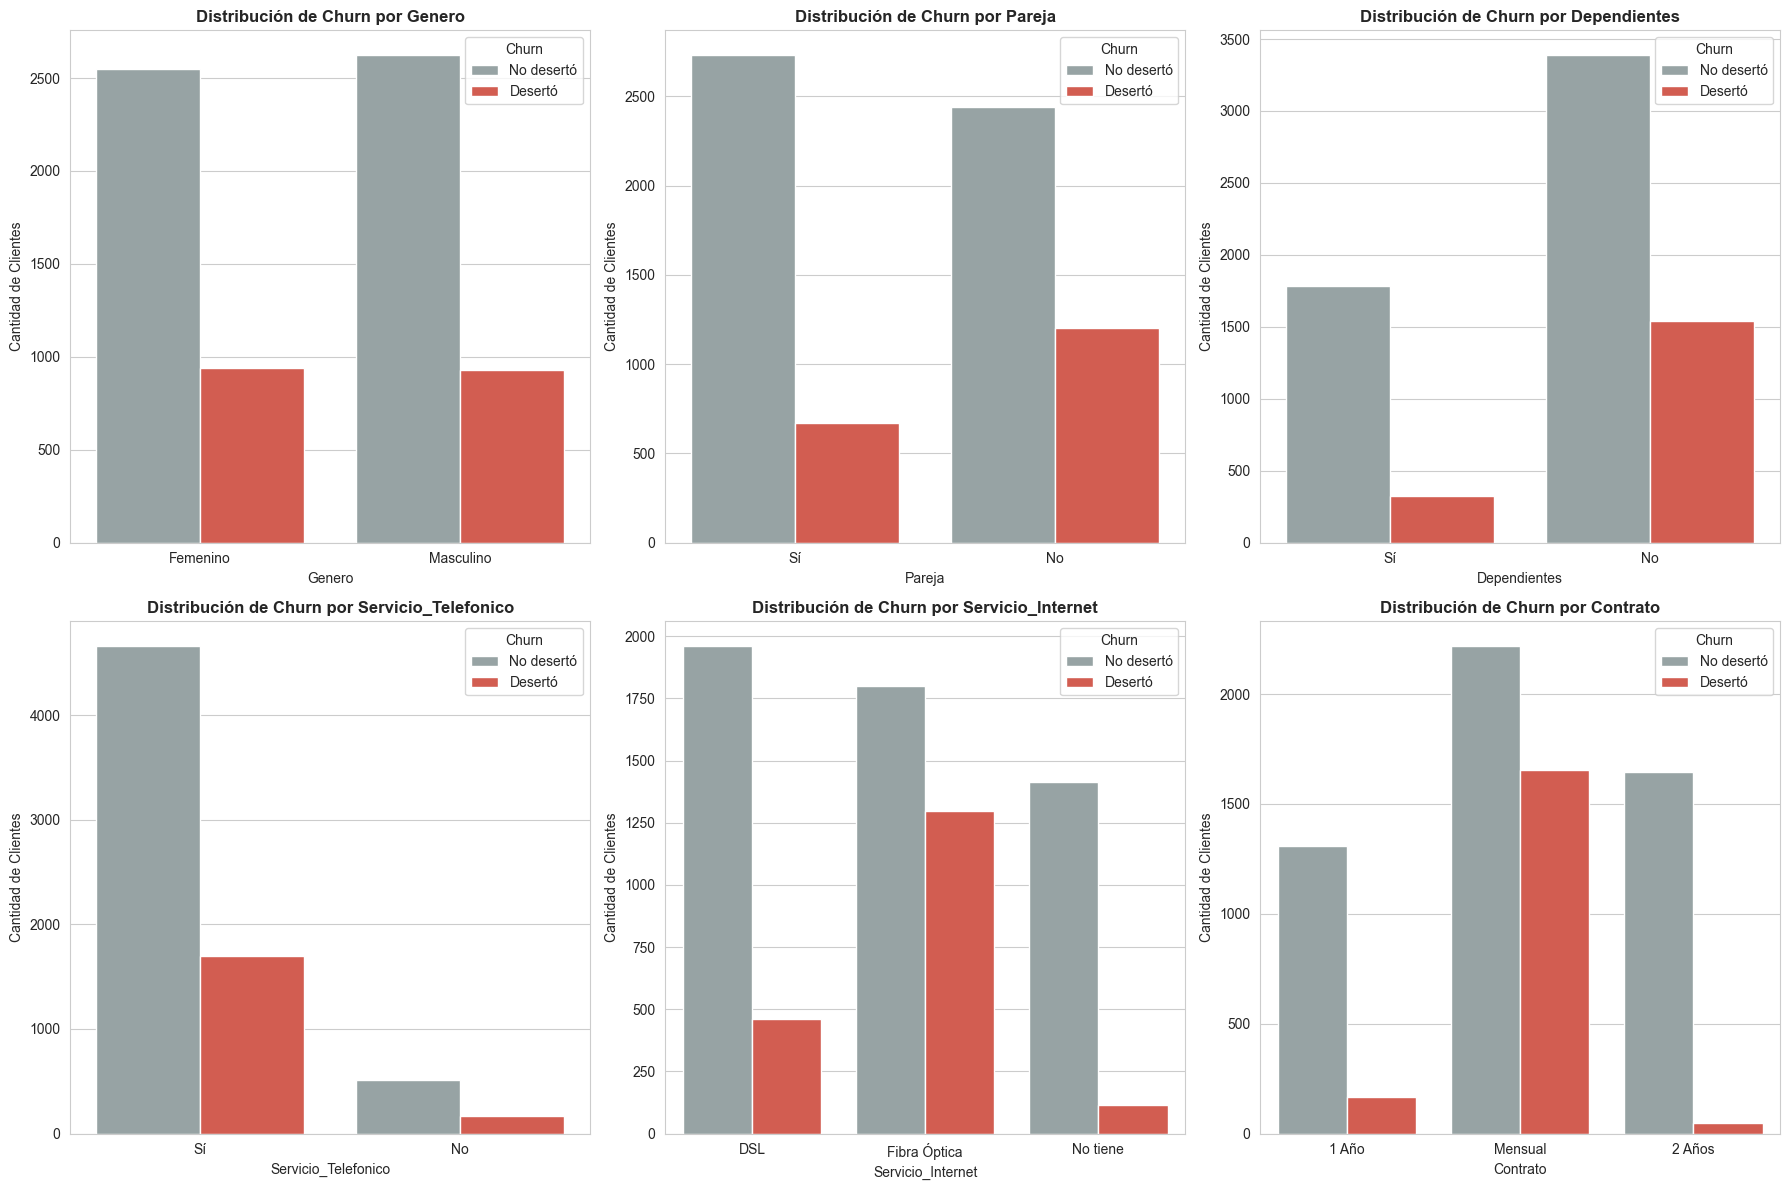

In [24]:
sns.set_style("whitegrid")
plt.figure(figsize=(18, 12)) 
columnas_a_graficar = [
    'Genero', 
    'Pareja', 
    'Dependientes', 
    'Servicio_Telefonico', 
    'Servicio_Internet', 
    'Contrato' 
]

colores = {"No desertó": "#95A5A6", "Desertó": "#E74C3C"}

for i, columna in enumerate(columnas_a_graficar):

    plt.subplot(2, 3, i + 1)

    ax = sns.countplot(data=df_viz, x=columna, hue='Churn', palette=colores)

    plt.title(f'Distribución de Churn por {columna}', fontsize=12, fontweight='bold')
    plt.xlabel(columna, fontsize=10)
    plt.ylabel('Cantidad de Clientes', fontsize=10)
    
    plt.legend(title='Churn')

plt.tight_layout()
plt.show()

#### **💡 Insight Clave:** Perfil de Riesgo del Cliente
Al desglosar los datos, detectamos patrones claros de comportamiento:

***Contrato:*** Es el factor más drástico. Los usuarios con contrato mensual tienen una tasa de abandono altísima, mientras que los contratos a 1 o 2 años son muy estables.

***Internet:*** Los usuarios de Fibra Óptica son los que más cancelan, lo cual sugiere problemas de precio o calidad en este servicio específico.

***Demografía***: Las personas sin pareja ni dependientes son más volátiles. El género no influye en la decisión.

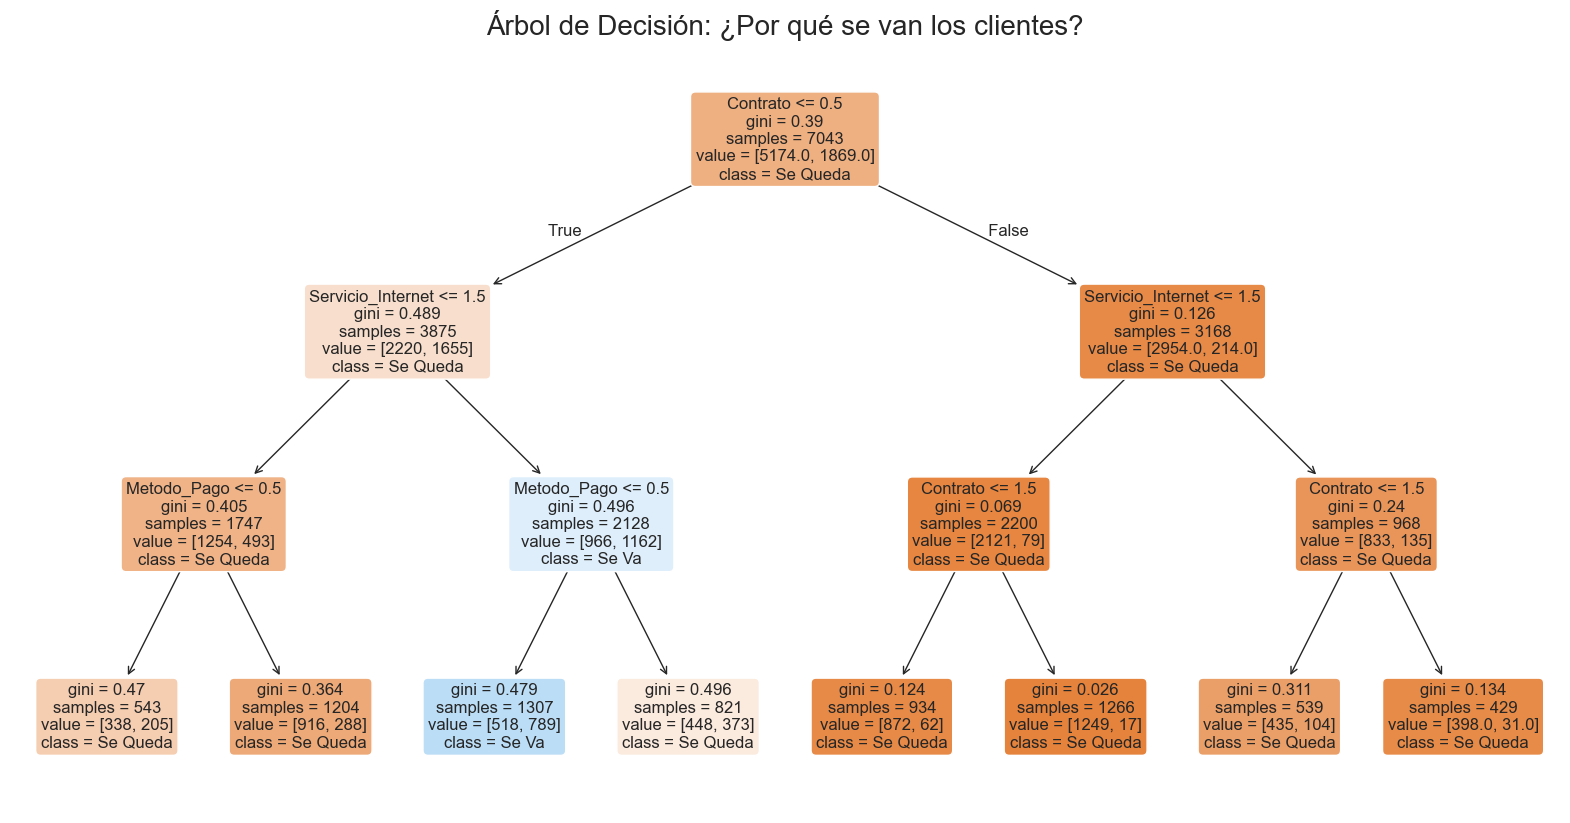

In [25]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

# 1. PREPARAR LOS DATOS
# Vamos a usar solo las variables que creemos que importan para no hacer un árbol gigante y confuso
# X = Las preguntas (Features)
# y = La respuesta (Target)
features = ['Servicio_Internet', 'Contrato', 'Metodo_Pago', 'Dependientes', 'Pareja']
X = df_telecom[features]
y = df_telecom['Churn']

# 2. ENTRENAR EL MODELO (El Cerebro)
# max_depth=3: Le decimos que solo haga 3 niveles de preguntas para que sea legible
arbol = DecisionTreeClassifier(max_depth=3, random_state=42)
arbol.fit(X, y)

# 3. DIBUJAR EL ÁRBOL (El Mapa)
plt.figure(figsize=(20, 10))
plot_tree(arbol, 
          feature_names=features, 
          class_names=['Se Queda', 'Se Va'], # 0=Se Queda, 1=Se Va
          filled=True, # Colores bonitos (Azul=Bien, Naranja=Mal)
          rounded=True, 
          fontsize=12)

plt.title("Árbol de Decisión: ¿Por qué se van los clientes?", fontsize=20)

plt.savefig('images/decision_tree.png', dpi=300, bbox_inches='tight')
plt.show()

plt.show()

#### 💡 **Insight Clave:** La "Receta" de la Deserción
El algoritmo identificó la combinación exacta de factores que causan la fuga:

**Contrato Mensual:** Es el detonante principal (la raíz del problema).

**Fibra Óptica:** Es el acelerador. Los clientes con contrato mensual Y fibra tienen el riesgo más alto de todos.

**Método de Pago:** El pago con Cheque Electrónico agrava el problema.

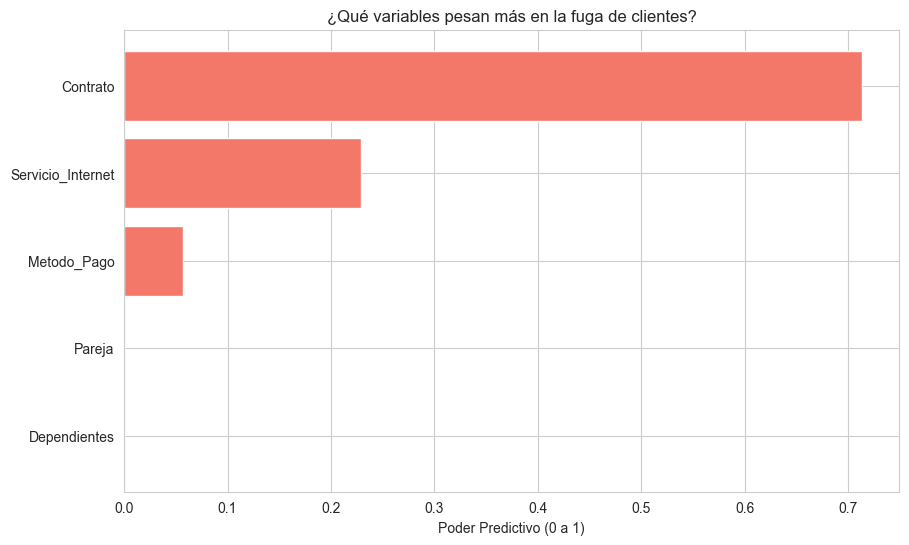

In [26]:
import pandas as pd
import matplotlib.pyplot as plt

# Extraer la importancia de las variables del árbol que ya entrenaste
importancias = arbol.feature_importances_
nombres_features = features # La lista ['Servicio_Internet', 'Contrato', etc.]

# Crear un DataFrame para graficar
df_importancia = pd.DataFrame({'Variable': nombres_features, 'Importancia': importancias})
df_importancia = df_importancia.sort_values(by='Importancia', ascending=True)

# Graficar
plt.figure(figsize=(10, 6))
plt.barh(df_importancia['Variable'], df_importancia['Importancia'], color="#F3786A")
plt.title('¿Qué variables pesan más en la fuga de clientes?')
plt.xlabel('Poder Predictivo (0 a 1)')

plt.savefig('images/feature_importance.png', dpi=300, bbox_inches='tight')
plt.show()

plt.show()

#### 💡 **Insight Clave:** Los "Drivers" de la Fuga
El modelo predictivo confirma matemáticamente lo observado: el Tipo de Contrato es, por mucho, la variable número 1 para predecir la fuga.

**Estrategia:** Si logramos migrar a los usuarios de planes mensuales a planes anuales, atacaremos la raíz principal del problema. El segundo factor a revisar es el servicio de Fibra Óptica.

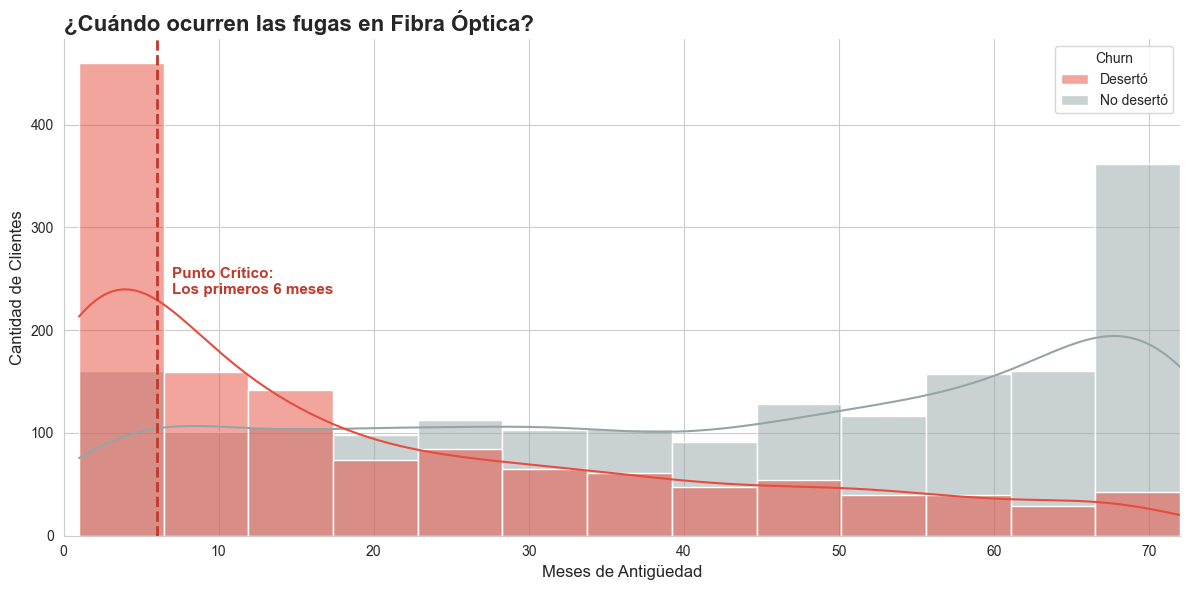

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

df_fibra = df_viz[df_viz['Servicio_Internet'] == 'Fibra Óptica']

plt.figure(figsize=(12, 6))
sns.set_style("whitegrid")

# La gráfica maestra
sns.histplot(data=df_fibra, x='Meses_Contrato', hue='Churn', 
             multiple="layer", palette={'Desertó': '#E74C3C', 'No desertó': '#95A5A6'},
             edgecolor='white', kde=True, alpha=0.5)

# --- CORRECCIÓN: ELIMINAR ESPACIO NEGATIVO ---
plt.xlim(0, df_fibra['Meses_Contrato'].max()) # Fuerza a empezar en 0 y terminar en el máximo

# La línea del punto crítico
plt.axvline(x=6, color='#C0392B', linestyle='--', linewidth=2)
plt.text(7, 235, 'Punto Crítico:\nLos primeros 6 meses', color='#C0392B', fontweight='bold', fontsize=11)

plt.title('¿Cuándo ocurren las fugas en Fibra Óptica?', fontsize=16, fontweight='bold', loc='left')
plt.xlabel('Meses de Antigüedad', fontsize=12)
plt.ylabel('Cantidad de Clientes', fontsize=12)

sns.despine()
plt.tight_layout()

plt.savefig('images/tenure_churn.png', dpi=300, bbox_inches='tight')

plt.show()
plt.show()

#### 💡 **Insight Clave:** La "Zona de Peligro" (Mes 1 al 6)
El análisis temporal revela que la deserción no es gradual, sino explosiva al inicio.

**El Hallazgo:** La gran mayoría de los clientes de Fibra Óptica que perdemos, se van antes de cumplir 6 meses.

**La Esperanza:** Si logramos que un cliente sobreviva este primer semestre, se vuelve extremadamente leal (la curva gris a la derecha).

**Acción:** Necesitamos un programa de "Onboarding VIP" los primeros 90 días para evitar ese pico rojo inicial.

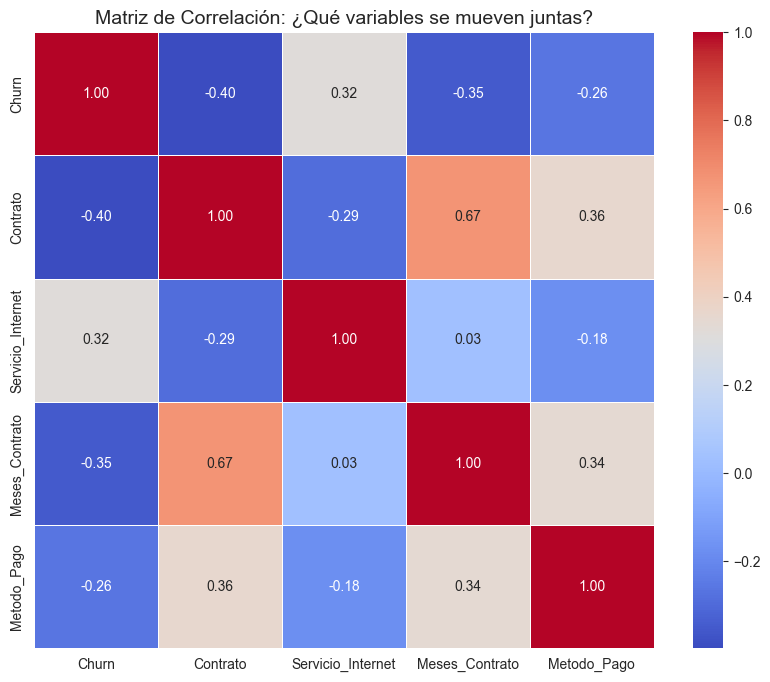

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

# Seleccionamos las variables numéricas principales para ver su relación
# Agregamos 'MonthlyCharges' (Cargos Mensuales) y 'TotalCharges' si las tienes numéricas
cols_correlacion = ['Churn', 'Contrato', 'Servicio_Internet', 'Meses_Contrato', 'Metodo_Pago']

# Calculamos la matriz de correlación (El famoso .corr() que pide Trello)
matriz_corr = df_telecom[cols_correlacion].corr()

# Graficamos el Mapa de Calor
plt.figure(figsize=(10, 8))
sns.heatmap(matriz_corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Matriz de Correlación: ¿Qué variables se mueven juntas?', fontsize=14)
plt.show()

### **💡 Insight Clave:** La "Ancla" de la Retención
Mirando la fila de `Churn`, el hallazgo más potente es la relación con `Contrato` (-0.40):

Existe una correlación negativa moderada entre el tipo de contrato y la fuga.

A medida que el valor del `contrato` aumenta (de mensual a 1 o 2 años), la probabilidad de **deserción baja significativamente.**

El `Servicio_Internet` tiene una correlación de 0.32, lo que confirma que el `tipo de internet` (específicamente la fibra, como vimos antes) empuja al cliente a irse.

# 📄Informe final

Análisis de Retención de Clientes (Churn)

## 1. Introducción
El objetivo principal de este proyecto es analizar los factores que impulsan la pérdida de clientes (**Churn**) en la compañía de telecomunicaciones para proponer estrategias de retención basadas en datos. Tras el análisis inicial, se identificó una tasa de deserción global del **26.5%**, lo que implica que aproximadamente **1 de cada 4 clientes** abandona el servicio.

## 2. Limpieza y Tratamiento de Datos
Para garantizar la precisión del modelo y las visualizaciones, se realizó el siguiente tratamiento de datos:
* **Tratamiento de Nulos y Tipos**: Se validó que el dataset no presentara valores nulos en columnas críticas.
* **Codificación Numérica**: Se transformaron las variables categóricas (como 'Servicio_Internet' y 'Contrato') a valores numéricos para permitir el cálculo de la matriz de correlación y el entrenamiento del árbol de decisión.
* **Estandarización**: Se preparó un dataframe en español (`df_viz`) para generar reportes claros destinados a los stakeholders.

## 3. Análisis Exploratorio de Datos (EDA)
El análisis visual y estadístico reveló patrones determinantes en la fuga de clientes:
* **Distribución por Categorías**: Los clientes con **Contrato Mensual** y servicio de **Fibra Óptica** presentan los niveles más altos de deserción en comparación con otros segmentos.
* **Matriz de Correlación (Análisis Extra)**: Se detectó una correlación negativa significativa (**-0.40**) entre el tipo de contrato y la fuga, confirmando que la estabilidad del contrato es el principal factor de retención.
* **Análisis de Supervivencia**: Identificamos un "Punto Crítico" durante los primeros **6 meses** de antigüedad, donde ocurre el mayor volumen de cancelaciones de usuarios de fibra óptica.

## 4. Conclusiones e Insights
Mediante el uso de un **Árbol de Decisión**, se extrajeron las siguientes conclusiones clave:
* **La Ruta de la Deserción**: El perfil de máximo riesgo es el cliente con contrato mensual, fibra óptica y pago mediante cheque electrónico.
* **Poder Predictivo**: El modelo identificó que el **Contrato** es la variable con mayor importancia (superior al 0.7) para predecir si un cliente se quedará o se irá.

## 5. Recomendaciones Estratégicas
Basado en la evidencia recolectada, se recomiendan las siguientes acciones para reducir la evasión:
1. **Incentivos de Migración**: Lanzar promociones para convertir clientes de "Mes a Mes" a contratos anuales, atacando la causa raíz de la fuga.
2. **Estrategia de Onboarding**: Implementar un programa de atención prioritaria para nuevos clientes de fibra óptica durante sus primeros **6 meses**.
3. **Optimización de Pagos**: Ofrecer beneficios por cambiar el método de pago de "Cheque Electrónico" a pagos automáticos (tarjeta de crédito/débito) para reducir la fricción.